CreditPath-AI: Loan Default Risk Prediction with Recommendation Engine

[1] Loading Dataset...
✓ Dataset loaded successfully!
  Shape: (45000, 14)
  Rows: 45,000 | Columns: 14

First 5 rows:
   person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master        71948.0             0.0   
1          21        female      High School        12282.0             0.0   
2          25        female      High School        12438.0             3.0   
3          23        female         Bachelor        79753.0             0.0   
4          24          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT      35000    PERSONAL          16.02   
1                   OWN       1000   EDUCATION          11.14   
2              MORTGAGE       5500     MEDICAL          12.87   
3                  RENT      35000     MEDICAL          15.23   
4        

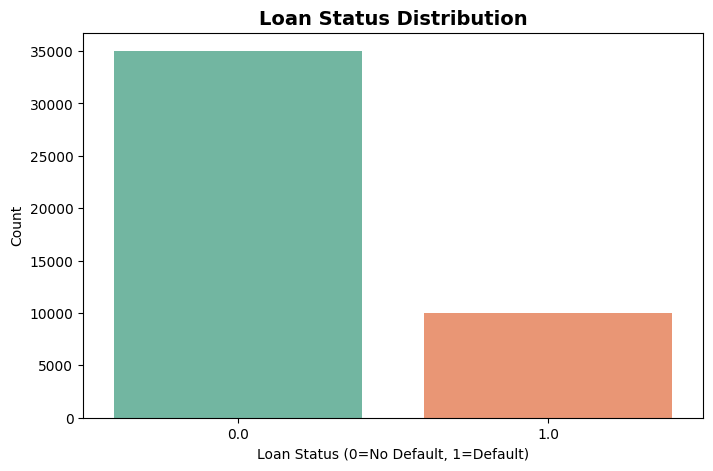

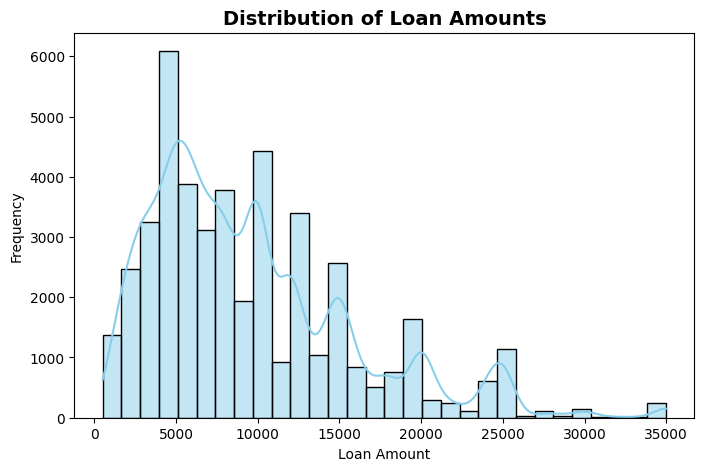

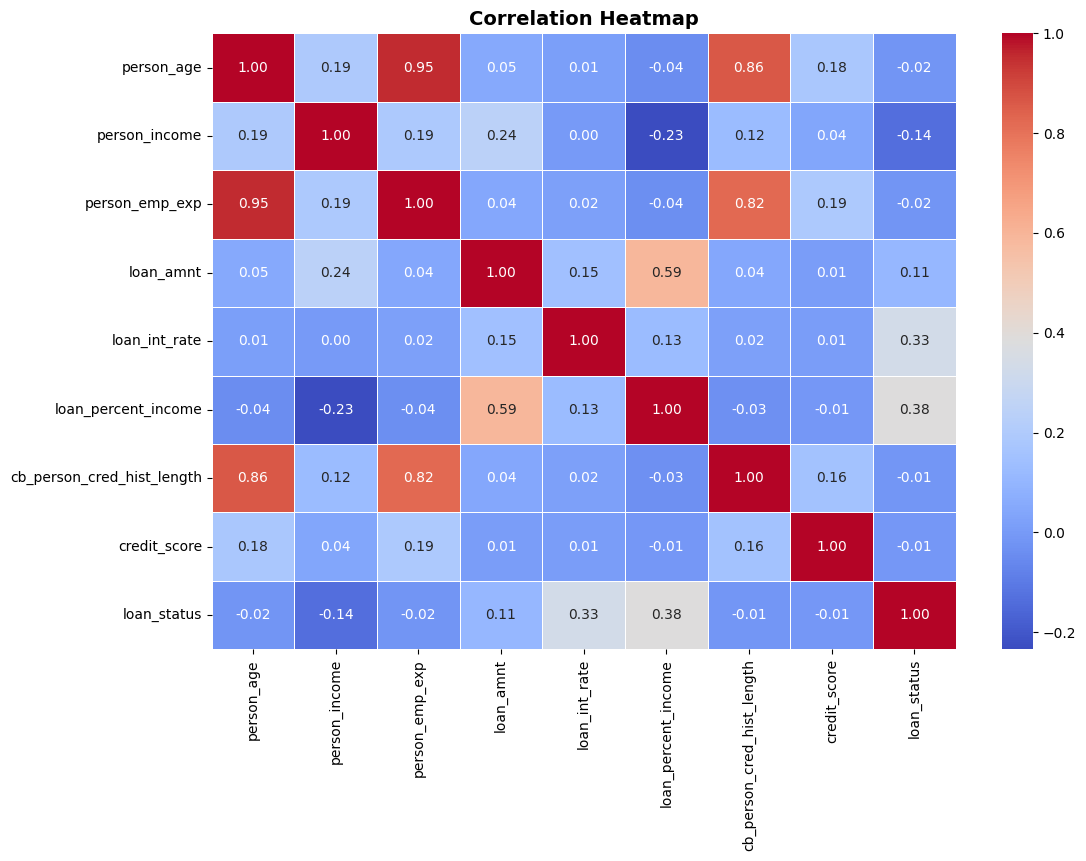

✓ EDA completed!

[3] Data Preprocessing...
  Handling missing values...
  ✓ Missing values handled. Remaining missing: 0
  Creating derived features...
  ✓ Derived features created: LTI_Ratio, Credit_Stability_Index
  Scaling numerical features...
  ✓ Numerical features scaled
  Encoding categorical variables...
  ✓ Encoding completed. Total features: 25

  Final Dataset Shape: X=(44999, 24), y=(44999,)

[4] Handling Class Imbalance with SMOTE...
  Before SMOTE: {0.0: 34999, 1.0: 10000}
  After SMOTE: {1.0: 34999, 0.0: 34999}
  ✓ Class balancing completed

[5] Splitting Dataset...
  Training Set: (55998, 24)
  Test Set: (14000, 24)

[6] Training Models...

  [6.1] Training Logistic Regression...
    AUC-ROC: 0.9551

  [6.2] Training XGBoost...
    AUC-ROC: 0.9897

  [6.3] Training LightGBM...
    AUC-ROC: 0.9907

MODEL EVALUATION RESULTS

Logistic Regression:
------------------------------------------------------------
  AUC-ROC Score: 0.9551

  Classification Report:
              pr

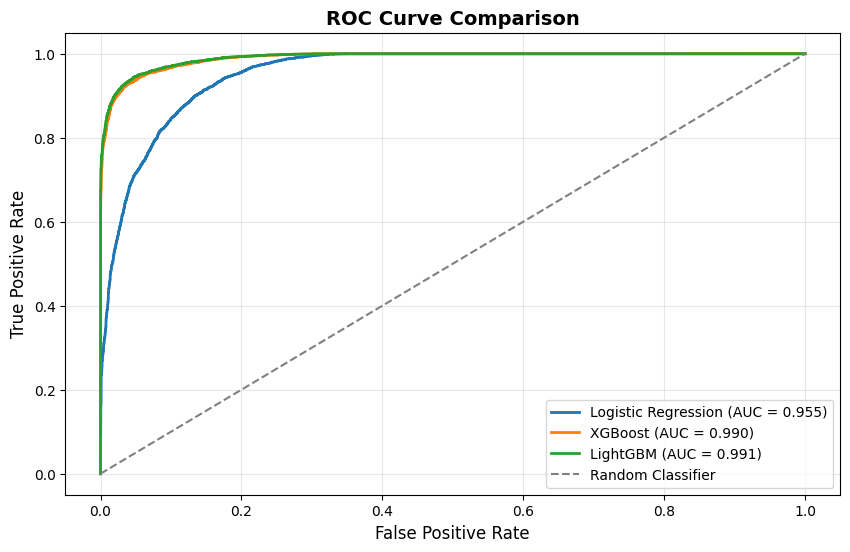


✓ Best Model: LightGBM with AUC = 0.9907

[8] Model Calibration Analysis...

  Checking if predicted probabilities match actual outcomes...


<Figure size 1000x600 with 0 Axes>

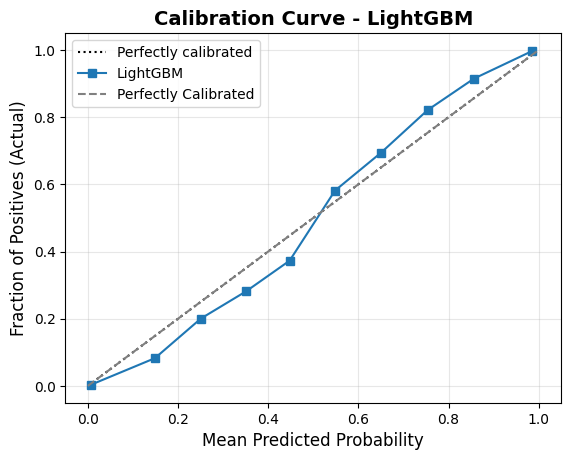


  ✓ Calibration analysis completed!
  Note: If curve is close to diagonal, model is well-calibrated.

[9] Implementing Threshold-Based Risk Classification...

  Risk Level Distribution:
High Risk      6626
Low Risk       6349
Medium Risk    1025
Name: count, dtype: int64


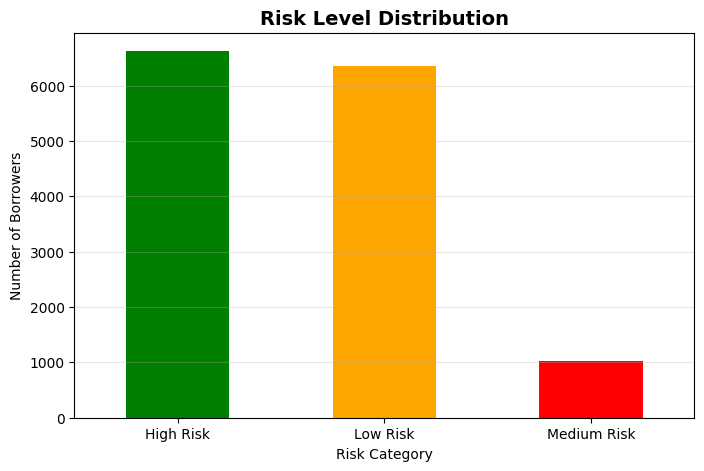

  ✓ Threshold-based classification completed!
  Thresholds: Low < 0.3, Medium: 0.3-0.6, High > 0.6

[10] Building Recommendation Engine...

  Testing Recommendation Engine with sample predictions:

  ----------------------------------------------------------------------

  Default Probability: 0.15
  Risk Level: Low Risk
  Recommended Action: Send standard payment reminder
  Priority: Normal
  Method: Automated SMS/Email
  Timeline: Standard schedule
  ----------------------------------------------------------------------

  Default Probability: 0.45
  Risk Level: Medium Risk
  Recommended Action: Make personalized call to discuss the loan
  Priority: Medium
  Method: Personalized phone call
  Timeline: Within 3-5 business days
  ----------------------------------------------------------------------

  Default Probability: 0.85
  Risk Level: High Risk
  Recommended Action: Prioritize collection efforts from borrower
  Priority: Urgent
  Method: Direct intervention by senior agent
  Tim

<Figure size 1000x600 with 0 Axes>

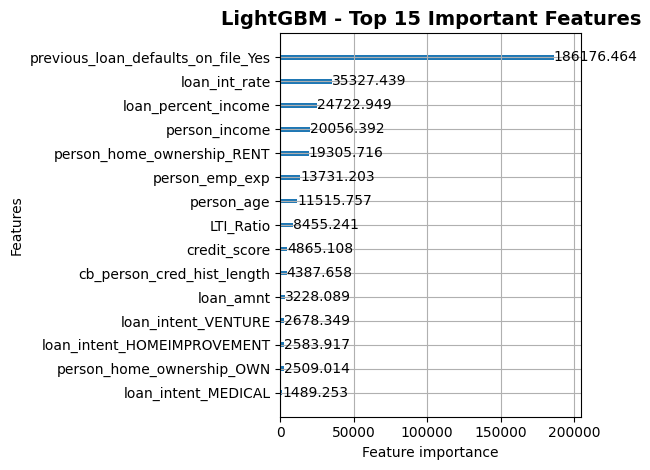

  ✓ Feature importance visualized!

[12] Saving Model and Artifacts...
  ✓ Model saved: /content/creditpath_model.pkl
  ✓ Scaler saved: /content/scaler.pkl
  ✓ Feature columns saved: /content/feature_columns.pkl
  ✓ Thresholds saved: /content/thresholds.pkl
  ✓ Complete artifacts saved: /content/model_artifacts.pkl

[13] Verifying Model Loading and Prediction Pipeline...
  ✓ Model loaded successfully!

  Test Prediction Results:
    Default Probability: 0.0323
    Risk Level: Low Risk
    Recommended Action: Send standard payment reminder

MODEL TRAINING & DEPLOYMENT PREPARATION COMPLETED!

📊 Model Performance:
   Best Model: LightGBM
   AUC-ROC Score: 0.9907
   Total Features: 24

🎯 Risk Classification Thresholds:
   Low Risk: < 0.3
   Medium Risk: 0.3 - 0.6
   High Risk: > 0.6

💡 Recommendation Engine:
   ✓ Low Risk → Standard payment reminder
   ✓ Medium Risk → Personalized call
   ✓ High Risk → Priority collection efforts

📁 Files Generated:
   1. /content/creditpath_model.pkl - Tr

In [3]:
# CreditPath-AI: Complete ML Model Pipeline with Recommendation Engine
# Includes: EDA, Preprocessing, Model Training, Calibration, Thresholds, and Action Recommendations

import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import os

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                              roc_auc_score, roc_curve, precision_score,
                              recall_score, f1_score)
from sklearn.calibration import calibration_curve, CalibrationDisplay

# Boosting models
import xgboost as xgb
import lightgbm as lgb

# Class balancing
from imblearn.over_sampling import SMOTE

print("=" * 80)
print("CreditPath-AI: Loan Default Risk Prediction with Recommendation Engine")
print("=" * 80)

# ==============================================================================
# STEP 1: DATA LOADING
# ==============================================================================
print("\n[1] Loading Dataset...")

# Load the dataset (update path as needed)
df = pd.read_excel('/content/loan_data.csv.xlsx')

print(f"✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape}")
print(f"  Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# ==============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================
print("\n[2] Exploratory Data Analysis...")

# Dataset info
print("\nDataset Info:")
df.info()

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check missing values
print("\nMissing Values:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

# Target variable distribution
print("\nTarget Variable Distribution (loan_status):")
print(df['loan_status'].value_counts())
default_rate = df['loan_status'].sum() / len(df) * 100
print(f"  Default Rate: {default_rate:.2f}%")

# Visualizations
print("\n  Generating visualizations...")

# 1. Loan Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status (0=No Default, 1=Default)')
plt.ylabel('Count')
plt.show()

# 2. Loan Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amounts', fontsize=14, fontweight='bold')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# 3. Correlation Heatmap
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

print("✓ EDA completed!")

# ==============================================================================
# STEP 3: DATA PREPROCESSING
# ==============================================================================
print("\n[3] Data Preprocessing...")

# 3.1 Handle Missing Values
print("  Handling missing values...")

# Fill numeric columns with median
numeric_cols = ['person_income', 'person_emp_exp', 'loan_int_rate',
                'loan_percent_income', 'cb_person_cred_hist_length']

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing target variable
df.dropna(subset=['loan_status'], inplace=True)

print(f"  ✓ Missing values handled. Remaining missing: {df.isnull().sum().sum()}")

# 3.2 Feature Engineering - Create Derived Features
print("  Creating derived features...")

# Loan-to-Income Ratio
df['LTI_Ratio'] = df['loan_amnt'] / df['person_income']

# Credit Stability Index
df['Credit_Stability_Index'] = df['credit_score'] / (df['cb_person_cred_hist_length'] + 1)

print("  ✓ Derived features created: LTI_Ratio, Credit_Stability_Index")

# 3.3 Feature Scaling (BEFORE one-hot encoding)
print("  Scaling numerical features...")

numerical_features = ['person_age', 'person_income', 'person_emp_exp',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                      'cb_person_cred_hist_length', 'credit_score',
                      'LTI_Ratio', 'Credit_Stability_Index']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("  ✓ Numerical features scaled")

# 3.4 One-Hot Encoding for Categorical Variables
print("  Encoding categorical variables...")

df = pd.get_dummies(df, drop_first=True)

print(f"  ✓ Encoding completed. Total features: {df.shape[1]}")

# 3.5 Separate Features and Target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Save feature columns for later use in API
feature_columns = X.columns.tolist()

print(f"\n  Final Dataset Shape: X={X.shape}, y={y.shape}")

# ==============================================================================
# STEP 4: HANDLE CLASS IMBALANCE WITH SMOTE
# ==============================================================================
print("\n[4] Handling Class Imbalance with SMOTE...")

print(f"  Before SMOTE: {y.value_counts().to_dict()}")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"  After SMOTE: {pd.Series(y_resampled).value_counts().to_dict()}")
print("  ✓ Class balancing completed")

# ==============================================================================
# STEP 5: TRAIN-TEST SPLIT
# ==============================================================================
print("\n[5] Splitting Dataset...")

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"  Training Set: {X_train.shape}")
print(f"  Test Set: {X_test.shape}")

# ==============================================================================
# STEP 6: MODEL TRAINING
# ==============================================================================
print("\n[6] Training Models...")

# Dictionary to store all models and their results
models_results = {}

# -----------------
# 6.1 Logistic Regression (Baseline)
# -----------------
print("\n  [6.1] Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_proba = lr_model.predict_proba(X_test)[:, 1]

models_results['Logistic Regression'] = {
    'model': lr_model,
    'predictions': y_pred_lr,
    'probabilities': y_pred_lr_proba,
    'auc': roc_auc_score(y_test, y_pred_lr_proba)
}

print(f"    AUC-ROC: {models_results['Logistic Regression']['auc']:.4f}")

# -----------------
# 6.2 XGBoost
# -----------------
print("\n  [6.2] Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

models_results['XGBoost'] = {
    'model': xgb_model,
    'predictions': y_pred_xgb,
    'probabilities': y_pred_xgb_proba,
    'auc': roc_auc_score(y_test, y_pred_xgb_proba)
}

print(f"    AUC-ROC: {models_results['XGBoost']['auc']:.4f}")

# -----------------
# 6.3 LightGBM
# -----------------
print("\n  [6.3] Training LightGBM...")
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    verbose=-1
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

models_results['LightGBM'] = {
    'model': lgb_model,
    'predictions': y_pred_lgb,
    'probabilities': y_pred_lgb_proba,
    'auc': roc_auc_score(y_test, y_pred_lgb_proba)
}

print(f"    AUC-ROC: {models_results['LightGBM']['auc']:.4f}")

# ==============================================================================
# STEP 7: MODEL EVALUATION
# ==============================================================================
print("\n" + "=" * 80)
print("MODEL EVALUATION RESULTS")
print("=" * 80)

for model_name, result in models_results.items():
    print(f"\n{model_name}:")
    print("-" * 60)
    print(f"  AUC-ROC Score: {result['auc']:.4f}")
    print(f"\n  Classification Report:")
    print(classification_report(y_test, result['predictions']))
    print(f"  Confusion Matrix:")
    print(confusion_matrix(y_test, result['predictions']))

# Compare ROC Curves
print("\n  Generating ROC Curve Comparison...")
plt.figure(figsize=(10, 6))

for model_name, result in models_results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {result['auc']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Select Best Model
best_model_name = max(models_results, key=lambda x: models_results[x]['auc'])
best_model = models_results[best_model_name]['model']
best_probabilities = models_results[best_model_name]['probabilities']

print(f"\n✓ Best Model: {best_model_name} with AUC = {models_results[best_model_name]['auc']:.4f}")

# ==============================================================================
# STEP 8: MODEL CALIBRATION CHECK
# ==============================================================================
print("\n[8] Model Calibration Analysis...")

print("\n  Checking if predicted probabilities match actual outcomes...")

# Calibration curve for best model
plt.figure(figsize=(10, 6))
CalibrationDisplay.from_predictions(y_test, best_probabilities, n_bins=10, name=best_model_name)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly Calibrated')
plt.title(f'Calibration Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Mean Predicted Probability', fontsize=12)
plt.ylabel('Fraction of Positives (Actual)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\n  ✓ Calibration analysis completed!")
print("  Note: If curve is close to diagonal, model is well-calibrated.")

# ==============================================================================
# STEP 9: THRESHOLD-BASED RISK CLASSIFICATION
# ==============================================================================
print("\n[9] Implementing Threshold-Based Risk Classification...")

# Define Fixed Thresholds
LOW_THRESHOLD = 0.3
HIGH_THRESHOLD = 0.6

def classify_risk(probability):
    """Classify risk level based on default probability"""
    if probability < LOW_THRESHOLD:
        return "Low Risk"
    elif probability < HIGH_THRESHOLD:
        return "Medium Risk"
    else:
        return "High Risk"

# Apply classification
risk_classifications = [classify_risk(p) for p in best_probabilities]

# Count distribution
risk_distribution = pd.Series(risk_classifications).value_counts()
print("\n  Risk Level Distribution:")
print(risk_distribution)

# Visualize risk distribution
plt.figure(figsize=(8, 5))
risk_distribution.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Risk Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Risk Category')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("  ✓ Threshold-based classification completed!")
print(f"  Thresholds: Low < {LOW_THRESHOLD}, Medium: {LOW_THRESHOLD}-{HIGH_THRESHOLD}, High > {HIGH_THRESHOLD}")

# ==============================================================================
# STEP 10: RECOMMENDATION ENGINE
# ==============================================================================
print("\n[10] Building Recommendation Engine...")

def get_recommendation(probability):
    """
    Generate action recommendation based on default probability
    Following mentor's guidelines for credit risk management
    """
    if probability < 0.3:
        return {
            'risk_level': 'Low Risk',
            'action': 'Send standard payment reminder',
            'priority': 'Normal',
            'method': 'Automated SMS/Email',
            'timeline': 'Standard schedule',
            'details': 'Borrower shows good repayment capability. Continue regular monitoring.'
        }
    elif probability < 0.6:
        return {
            'risk_level': 'Medium Risk',
            'action': 'Make personalized call to discuss the loan',
            'priority': 'Medium',
            'method': 'Personalized phone call',
            'timeline': 'Within 3-5 business days',
            'details': 'Borrower shows moderate risk. Schedule call to understand situation and offer support.'
        }
    else:
        return {
            'risk_level': 'High Risk',
            'action': 'Prioritize collection efforts from borrower',
            'priority': 'Urgent',
            'method': 'Direct intervention by senior agent',
            'timeline': 'Within 24-48 hours',
            'details': 'High default probability. Immediate action required. Consider loan restructuring or recovery process.'
        }

# Test recommendation engine
print("\n  Testing Recommendation Engine with sample predictions:")
print("\n  " + "-" * 70)

test_probabilities = [0.15, 0.45, 0.85]
for prob in test_probabilities:
    rec = get_recommendation(prob)
    print(f"\n  Default Probability: {prob:.2f}")
    print(f"  Risk Level: {rec['risk_level']}")
    print(f"  Recommended Action: {rec['action']}")
    print(f"  Priority: {rec['priority']}")
    print(f"  Method: {rec['method']}")
    print(f"  Timeline: {rec['timeline']}")
    print("  " + "-" * 70)

print("\n  ✓ Recommendation engine implemented successfully!")

# ==============================================================================
# STEP 11: FEATURE IMPORTANCE
# ==============================================================================
print("\n[11] Feature Importance Analysis...")

if best_model_name in ['XGBoost', 'LightGBM']:
    plt.figure(figsize=(10, 6))
    if best_model_name == 'XGBoost':
        xgb.plot_importance(best_model, max_num_features=15, importance_type='weight')
    else:
        lgb.plot_importance(best_model, max_num_features=15, importance_type='gain')

    plt.title(f'{best_model_name} - Top 15 Important Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("  ✓ Feature importance visualized!")

# ==============================================================================
# STEP 12: SAVE MODEL AND ARTIFACTS
# ==============================================================================
print("\n[12] Saving Model and Artifacts...")

# Get current working directory
current_dir = os.getcwd()

# Create comprehensive model artifacts dictionary
model_artifacts = {
    'model': best_model,
    'scaler': scaler,
    'feature_columns': feature_columns,
    'model_name': best_model_name,
    'auc_score': models_results[best_model_name]['auc'],
    'thresholds': {
        'low': LOW_THRESHOLD,
        'high': HIGH_THRESHOLD
    },
    'recommendation_engine': get_recommendation
}

# Define file paths
model_path = os.path.join(current_dir, 'creditpath_model.pkl')
scaler_path = os.path.join(current_dir, 'scaler.pkl')
features_path = os.path.join(current_dir, 'feature_columns.pkl')
thresholds_path = os.path.join(current_dir, 'thresholds.pkl')
artifacts_path = os.path.join(current_dir, 'model_artifacts.pkl')


# Save individual components
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"  ✓ Model saved: {model_path}")

with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"  ✓ Scaler saved: {scaler_path}")

with open(features_path, 'wb') as f:
    pickle.dump(feature_columns, f)
print(f"  ✓ Feature columns saved: {features_path}")

# Save thresholds configuration
thresholds_config = {
    'low_threshold': LOW_THRESHOLD,
    'high_threshold': HIGH_THRESHOLD
}
with open(thresholds_path, 'wb') as f:
    pickle.dump(thresholds_config, f)
print(f"  ✓ Thresholds saved: {thresholds_path}")


# Save complete artifacts (all-in-one)
with open(artifacts_path, 'wb') as f:
    pickle.dump(model_artifacts, f)
print(f"  ✓ Complete artifacts saved: {artifacts_path}")


# ==============================================================================
# STEP 13: VERIFICATION - TEST MODEL LOADING
# ==============================================================================
print("\n[13] Verifying Model Loading and Prediction Pipeline...")

# Load saved components
loaded_model = pickle.load(open(model_path, 'rb'))
loaded_scaler = pickle.load(open(scaler_path, 'rb'))
loaded_features = pickle.load(open(features_path, 'rb'))
loaded_thresholds = pickle.load(open(thresholds_path, 'rb'))


# Make test prediction
test_sample = X_test.iloc[0:1]
test_prediction_proba = loaded_model.predict_proba(test_sample)[:, 1][0]
test_recommendation = get_recommendation(test_prediction_proba)

print(f"  ✓ Model loaded successfully!")
print(f"\n  Test Prediction Results:")
print(f"    Default Probability: {test_prediction_proba:.4f}")
print(f"    Risk Level: {test_recommendation['risk_level']}")
print(f"    Recommended Action: {test_recommendation['action']}")

# ==============================================================================
# FINAL SUMMARY
# ==============================================================================
print("\n" + "=" * 80)
print("MODEL TRAINING & DEPLOYMENT PREPARATION COMPLETED!")
print("=" * 80)

print(f"\n📊 Model Performance:")
print(f"   Best Model: {best_model_name}")
print(f"   AUC-ROC Score: {models_results[best_model_name]['auc']:.4f}")
print(f"   Total Features: {len(feature_columns)}")

print(f"\n🎯 Risk Classification Thresholds:")
print(f"   Low Risk: < {LOW_THRESHOLD}")
print(f"   Medium Risk: {LOW_THRESHOLD} - {HIGH_THRESHOLD}")
print(f"   High Risk: > {HIGH_THRESHOLD}")

print(f"\n💡 Recommendation Engine:")
print(f"   ✓ Low Risk → Standard payment reminder")
print(f"   ✓ Medium Risk → Personalized call")
print(f"   ✓ High Risk → Priority collection efforts")

print(f"\n📁 Files Generated:")
print(f"   1. {model_path} - Trained {best_model_name} model")
print(f"   2. {scaler_path} - StandardScaler for preprocessing")
print(f"   3. {features_path} - Feature names list")
print(f"   4. {thresholds_path} - Risk classification thresholds")
print(f"   5. {artifacts_path} - Complete package (all-in-one)")


print("\n📥 Next Steps:")
print("   1. Download all .pkl files from Colab")
print("   2. Use them in FastAPI backend")
print("   3. Connect with frontend for end-to-end system")

print("\n" + "=" * 80)
print("✅ Ready for Production Deployment!")
print("=" * 80)

In [8]:
import pickle

# Make sure these variables exist from your previous run
# If they don't, you'll need to re-run the model training

try:
    # Save model
    with open('creditpath_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print("✓ Model saved: creditpath_model.pkl")

    # Save scaler
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("✓ Scaler saved: scaler.pkl")

    # Save feature columns
    with open('feature_columns.pkl', 'wb') as f:
        pickle.dump(feature_columns, f)
    print("✓ Feature columns saved: feature_columns.pkl")

    # Save thresholds
    thresholds_config = {
        'low_threshold': LOW_THRESHOLD,
        'high_threshold': HIGH_THRESHOLD
    }
    with open('thresholds.pkl', 'wb') as f:
        pickle.dump(thresholds_config, f)
    print("✓ Thresholds saved: thresholds.pkl")

    # Save complete artifacts
    model_artifacts = {
        'model': best_model,
        'scaler': scaler,
        'feature_columns': feature_columns,
        'model_name': best_model_name,
        'auc_score': models_results[best_model_name]['auc'],
        'thresholds': thresholds_config
    }
    with open('model_artifacts.pkl', 'wb') as f:
        pickle.dump(model_artifacts, f)
    print("✓ Complete artifacts saved: model_artifacts.pkl")

    print("\n✅ All files saved successfully!")

    # Verify files exist
    import os
    print("\nFiles created:")
    for f in os.listdir():
        if f.endswith('.pkl'):
            size = os.path.getsize(f) / (1024*1024)  # MB
            print(f"  {f} ({size:.2f} MB)")

except NameError as e:
    print(f"❌ Error: {e}")
    print("\n⚠️ Variables not found. You need to re-run the model training code first.")

except Exception as e:
    print(f"❌ Unexpected error: {e}")

✓ Model saved: creditpath_model.pkl
✓ Scaler saved: scaler.pkl
✓ Feature columns saved: feature_columns.pkl
✓ Thresholds saved: thresholds.pkl
✓ Complete artifacts saved: model_artifacts.pkl

✅ All files saved successfully!

Files created:
  feature_columns.pkl (0.00 MB)
  scaler.pkl (0.00 MB)
  model_artifacts.pkl (0.55 MB)
  creditpath_model.pkl (0.55 MB)
  thresholds.pkl (0.00 MB)
